In [11]:
from skimage.io import imread, imshow, imsave
img = imread('img.png')
print(img.shape[1])

801


In [12]:
x, y = img.shape[0] // 2, img.shape[1] // 2
img[x, y] = [102, 204, 102]
imsave('out_img.png', img)

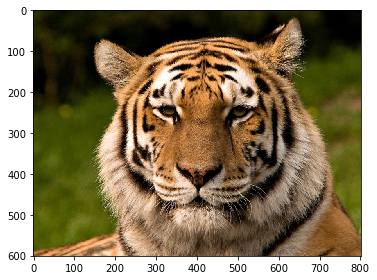

In [13]:
%matplotlib inline
imshow('out_img.png')

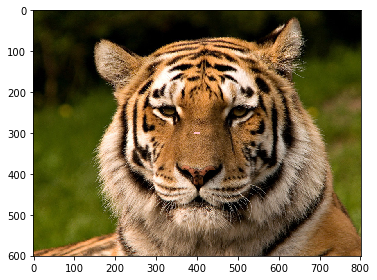

In [14]:
x_center, y_center = img.shape[0]//2, img.shape[1]//2
img[x_center-3:x_center+4, y_center-7:y_center+8] = [255, 192, 203]
imsave('out_img1.png', img)
imshow('out_img1.png')

In [15]:
def compare_colour(pixel, border_colour):
    return True if (pixel[0] == border_colour[0] and
                    pixel[1] == border_colour[1] and
                    pixel[2] == border_colour[2]) else False


img = imread('tiger-border.png')
red, green, blue = img[0, 0]
border_colour = [red, green, blue]
x, y = img.shape[0], img.shape[1]
start_left = 0
count_left = 1
while compare_colour(img[x//2, start_left + 1], border_colour):
    count_left += 1
    start_left += 1
start_top = 0
count_top = 1
while compare_colour(img[start_top + 1, y//2], border_colour):
    count_top += 1
    start_top += 1
start_right = y
count_right = 0
while compare_colour(img[x//2, start_right - 1], border_colour):
    count_right += 1
    start_right -= 1
start_bot = x
count_bot = 0
while compare_colour(img[start_bot - 1, y//2], border_colour):
    count_bot += 1
    start_bot -= 1
print(count_left, count_top, count_right, count_bot)

FileNotFoundError: No such file: 'c:\cs173\tiger-border.png'

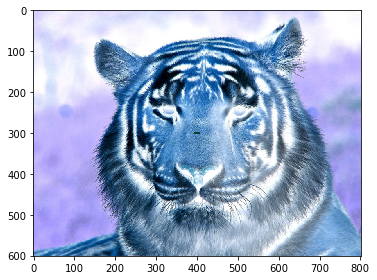

In [16]:
out_img = img.copy()
x, y = img.shape[0], img.shape[1]
for i in range(x):
    for j in range(y):
        out_img[i][j][0] = 255 - out_img[i][j][0]
        out_img[i][j][1] = 255 - out_img[i][j][1]
        out_img[i][j][2] = 255 - out_img[i][j][2]
imsave("negative.png", out_img)
imshow(out_img)

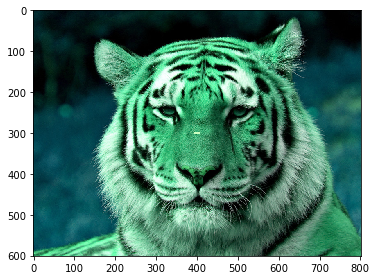

In [17]:
from numpy import dstack
from skimage import img_as_float, img_as_ubyte

f = img_as_float(img)
r = f[:, :, 0]
g = f[:, :, 1]
b = f[:, :, 2]
reverted = dstack((b, r, g))
reverted = img_as_ubyte(reverted)
imsave('reverted.png', reverted)
imshow(reverted)

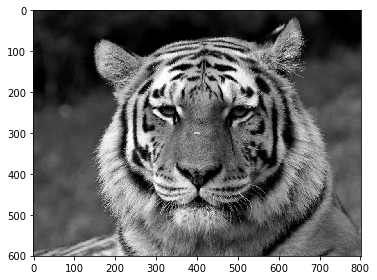

In [18]:
f_image = img_as_float(img)
r = f_image[:, :, 0]
g = f_image[:, :, 1]
b = f_image[:, :, 2]
gray_image = 0.2126 * r + 0.7152 * g + 0.0722 * b
imsave('gray_image.png', img_as_ubyte(gray_image))
imshow(gray_image)

-3 1
9 -1
((147, 238), (875, 236))


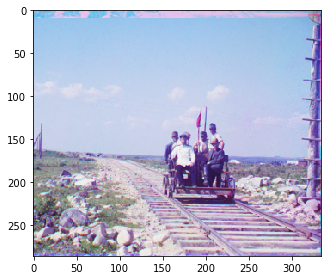

In [19]:
%matplotlib inline

from numpy import dstack, roll
from skimage.io import imread, imsave, imshow
from skimage.util import img_as_float, img_as_ubyte


def reduce(img, p: float = 0.1):
    '''Cutting off edges '''
    rows = img.shape[0]
    cols = img.shape[1]
    img = img[round(rows * p): round(rows * (1-p)),
              round(cols * p): round(cols * (1-p))]
    return img


def find_optimal_shift(img1, img2, px_shift: int = 15):
    '''Находим оптимальный сдвиг
    params: img1 - фиксированное изображение
    img2 - изображение, которое двигаем
    px_shift - модуль максимального отклонения сдвига'''
    max_correlation = 0
    for x in range(-px_shift, px_shift + 1):
        for y in range(-px_shift, px_shift + 1):
            shifted_x_img2 = roll(img2, x, axis=0)
            shifted_img2 = roll(shifted_x_img2, y, axis=1)
            correlation = (img1 * shifted_img2).sum()
            if correlation > max_correlation:
                max_correlation = correlation
                optimal_shift_x = x
                optimal_shift_y = y
                that_image = shifted_img2
    print(optimal_shift_x, optimal_shift_y)
    return (optimal_shift_x, optimal_shift_y, that_image)


def align(img, g_coord):
    row_g, col_g = g_coord

    '''getting separate r, g, b channels '''
    rows = img.shape[0]
    cols = img.shape[1]
    end_correct = img.shape[0] % 3  # for same height
    img = img_as_float(img)
    uncut_b = img[0: rows // 3, :]
    uncut_g = img[rows // 3: rows // 3 * 2, :]
    uncut_r = img[rows // 3 * 2: img.shape[0] - end_correct, :]
    r = reduce(uncut_r)
    g = reduce(uncut_g)
    b = reduce(uncut_b)

    '''moving channels '''
    blue_on_green = find_optimal_shift(img1=g, img2=b)
    red_on_green = find_optimal_shift(img1=g, img2=r)

    '''finding coordinates '''
    row_b = row_g + blue_on_green[0] - rows // 3
    col_b = col_g + blue_on_green[1]
    row_r = row_g + red_on_green[0] + rows // 3
    col_r = col_g + red_on_green[1]

    '''testing visuals '''
    shifted_b = blue_on_green[2]
    shifted_r = red_on_green[2]
    test_image = dstack((shifted_r, g, shifted_b))
    test_image = img_as_ubyte(test_image)
    imsave('test_image.png', test_image)

    return (row_b, col_b), (row_r, col_r)


if __name__ == '__main__':
    img = imread("C:\cs173\module1\\00.png")
    print(align(img, (508, 237)))
    imshow('C:\cs173\\test_image.png')
    #  Картинки, полученные после совмещения

-3 -1
8 1
((164, 236), (857, 238))


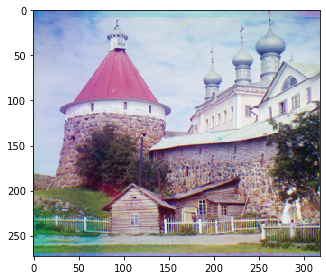

In [20]:
# Совмещение другого фото
img = imread("C:\cs173\module1\\01.png")
print(align(img, (508, 237)))
imshow('C:\cs173\\test_image.png')